#### 2020.06.22


## Dataset: PPMI - TO ADD, Delete results of IXI !!!

### Analyses

An analysis is performed with the use of NiftyNet software. The .ini file with all settigs was provided by ASL (nn_demo.ini). The following analysis were performed:

|     |     |     |     |
| :-: | :-: | :-: | :-: |
| Examination name    | Image              | Mask                          |  lr   |
| 01_IXI_FSL_biascorr | T1_biascorr.nii.gz | T1_biascorr_brain_mask.nii.gz |0.001  |
| 02_IXI_FSL_biascorr | T1_biascorr.nii.gz | T1_biascorr_brain_mask.nii.gz |0.0015 |
| 03_IXI_FSL_biascorr | T1_biascorr.nii.gz | T1_biascorr_brain_mask.nii.gz | 0.002 |
                      |                    |                               |       |
| 04_IXI_FSL_T1       | T1.nii.gz          | T1_biascorr_brain_mask.nii.gz |0.001  |
| 05_IXI_FSL_T1       | T1.nii.gz          | T1_biascorr_brain_mask.nii.gz |0.0015 |
| 06_IXI_FSL_T1       | T1.nii.gz          | T1_biascorr_brain_mask.nii.gz | 0.002 |

In [3]:
import pandas as pd
from fastai.utils.mem import *
import matplotlib.pyplot as plt

#### Some constants, pths, ...

In [2]:
data_set = 'IXI'
main_path = Path(f'/data-10tb/marek/{data_set}/NiftyNet/')

description_file = main_path / f'{data_set}_description.txt'

evaluation_mean = 'eval_label.csv'
evaluation_all = 'eval_subject_id_label.csv'

### Load experiment description from a file

In [3]:
#!cat '/data-10tb/marek/IXI/NiftyNet/IXI_description.txt'

In [4]:
description = pd.read_csv(description_file, header=None, delim_whitespace=True)
description.columns = ["Id", "Experiment name", "Learning rate", "Finished", 'Date']
description.iloc[:,:3]

,Id,Experiment name,Learning rate
0,1,01_IXI_FSL_biascorr,lr=0.001
1,2,02_IXI_FSL_biascorr,lr=0.0015
2,3,03_IXI_FSL_biascorr,lr=0.002
3,4,04_IXI_FSL_T1,lr=0.001
4,5,05_IXI_FSL_T1,lr=0.0015
5,6,06_IXI_FSL_T1,lr=0.002


#### Experiments

In [5]:
# # experiment name list
# experiments = Path(f'{main_path}/model/').ls()

# experiments.sort()
# experiments = [e.parts[-1] for e in experiments]
# _ = [print(f'{k} ---> {e}') for k,e in enumerate(experiments)]b

In [6]:
experiments = description.iloc[:,1:3]
experiments.loc[0]

Experiment name    01_IXI_FSL_biascorr
Learning rate                 lr=0.001
Name: 0, dtype: object

### Main function(s)

In [7]:
def wrap_text(text):
    k = len(text)
    print((k+8) * '*')
    print(f'*** {text} ***')
    print((k+8) * '*')

In [8]:
def plot_stats(experiment, show='DJHS'):
    """
    Plot Selection:
    D - Dice
    J - Jaccard
    H - Hausdorff_distance
    S - stat table
    """
    
    exper, lr_str = experiment
    lr = float(lr_str.split('=')[-1])
    
    
        
    wrap_text(f'Experiment {exper}')

    evaluation_folder = Path(f'{main_path}/model/{exper}/evaluations/')
    
    # Load evaluation file for all inference images
    df_all = pd.read_csv(evaluation_folder / evaluation_all)
    #df_all.head(3)
    
    # Data frame for Dice, Hausdorff distance and Jaccard coefficient statistics
    dct = {'dice':[df_all.dice.mean(), df_all.dice.std()],
       'hausdorff_distance':[df_all.hausdorff_distance.mean(), df_all.hausdorff_distance.std()],
       'jaccard':[df_all.jaccard.mean(), df_all.jaccard.std()], 'lr':[lr,lr]}
    df_stat = pd.DataFrame(dct, index=['mean', 'std'])
    if 'S' in show:
        print(df_stat)
        print(2*'\n')
    
    ##################
    ###  plot Dice ###
    ##################
    if 'D' in show:
        y1 = df_all.dice
        x = range(len(y1))

        labels = df_all.subject_id
        yerr = df_all.dice.std()

        plt.figure(figsize=(16,5))
        plt.errorbar(x, y1, yerr=yerr)
        plt.grid()
        p = plt.xticks(x, labels, rotation='vertical')
        _ = plt.title(f'{exper}, {lr};   Dice:  mean={df_stat.dice[0]:.3f}, std={df_stat.dice[1]:.4f}',
                  fontsize=18, fontweight='bold')
    
    ####################
    ### plot Jaccard ###
    ####################
    if 'J' in show:
        y2 = df_all.jaccard
        x = range(len(y2))

        labels = df_all.subject_id
        yerr = df_all.jaccard.std()

        plt.figure(figsize=(16,5))
        plt.errorbar(x, y2, yerr=yerr)
        plt.grid()
        p = plt.xticks(x, labels, rotation='vertical')
        _ = plt.title(f'{exper}; {lr};   Jaccard: mean={df_stat.jaccard[0]:.3f},\
            std={df_stat.jaccard[1]:.4f}',
                  fontsize=18, fontweight='bold')
    
    ###############################
    ### plot Hausdorff_distance ###
    ###############################
    if 'H' in show:
        y3 = df_all.hausdorff_distance
        x = range(len(y3))

        labels = df_all.subject_id
        yerr = df_all.hausdorff_distance.std()

        plt.figure(figsize=(16,5))
        plt.errorbar(x, y3, yerr=yerr)
        plt.grid()
        p = plt.xticks(x, labels, rotation='vertical')
        _ = plt.title(f'{exper}; {lr};   Hausdorff distance: mean={df_stat.hausdorff_distance[0]:.3f}\
                std={df_stat.hausdorff_distance[1]:.4f}', \
                  fontsize=18, fontweight='bold')
    return df_stat

### 01_IXI_FSL_biascorr

**************************************
*** Experiment 01_IXI_FSL_biascorr ***
**************************************
          dice  hausdorff_distance   jaccard     lr
mean  0.957665           15.765280  0.922427  0.001
std   0.053583           12.070126  0.072496  0.001





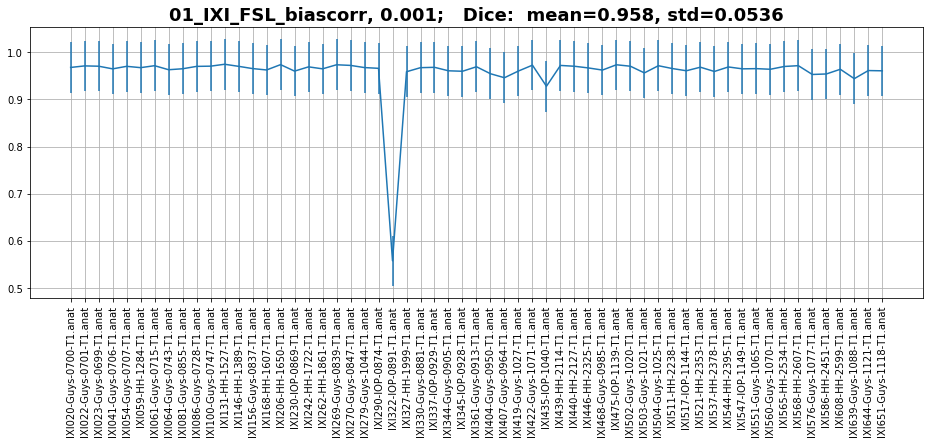

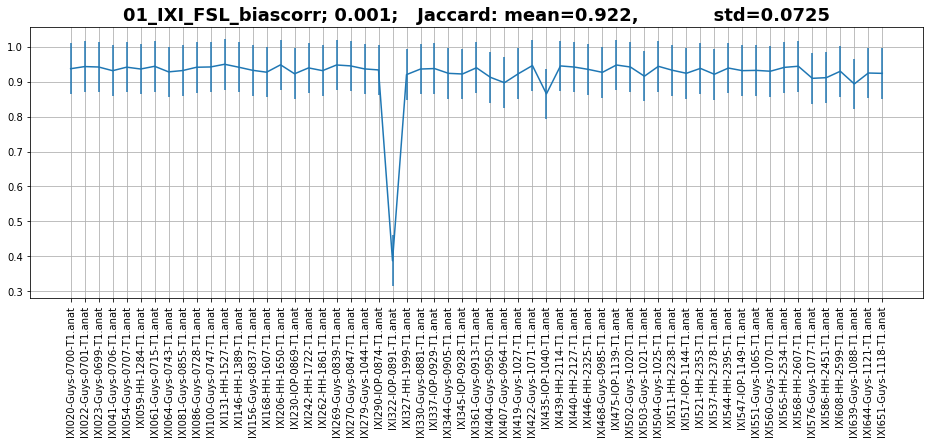

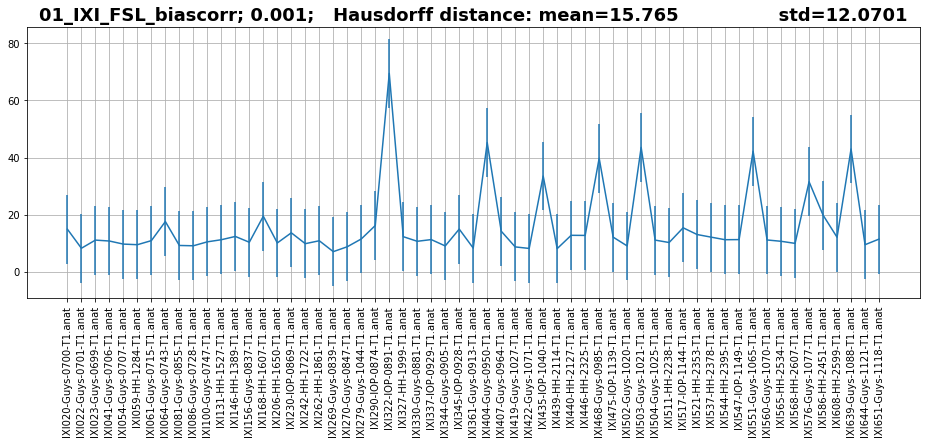

In [9]:
stat1 = plot_stats(experiments.loc[0])

### 02_IXI_FSL_biascorr

**************************************
*** Experiment 02_IXI_FSL_biascorr ***
**************************************
          dice  hausdorff_distance   jaccard      lr
mean  0.914230           36.260830  0.853806  0.0015
std   0.097811            9.517662  0.133754  0.0015





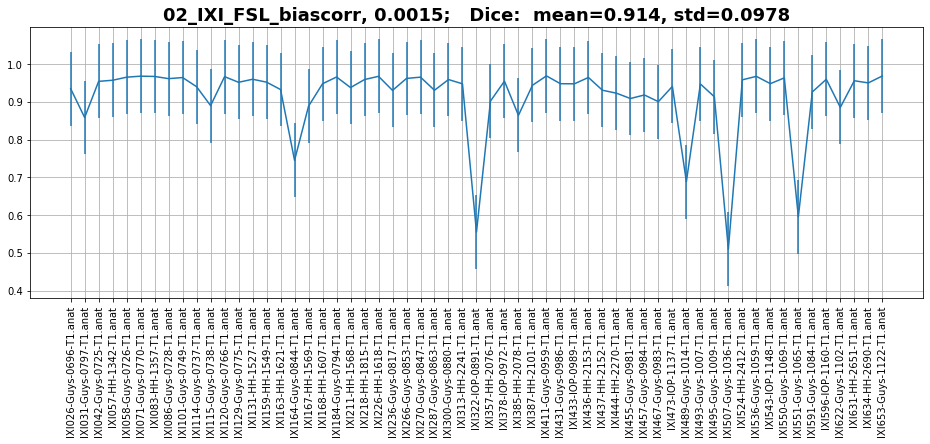

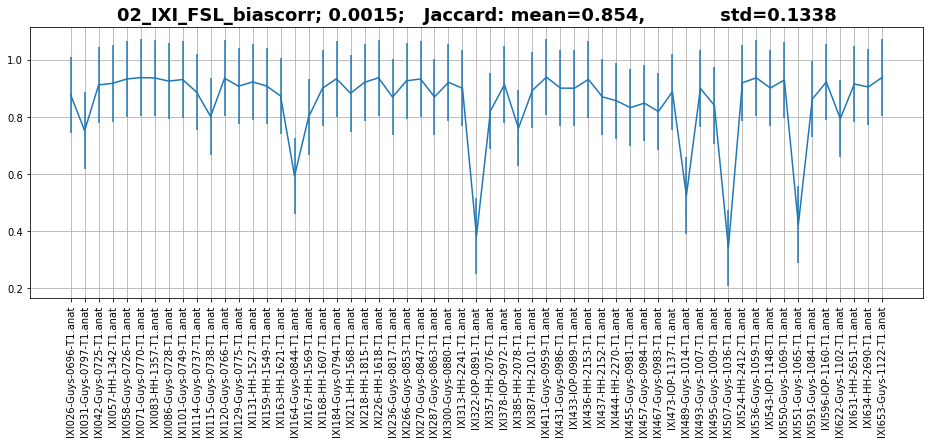

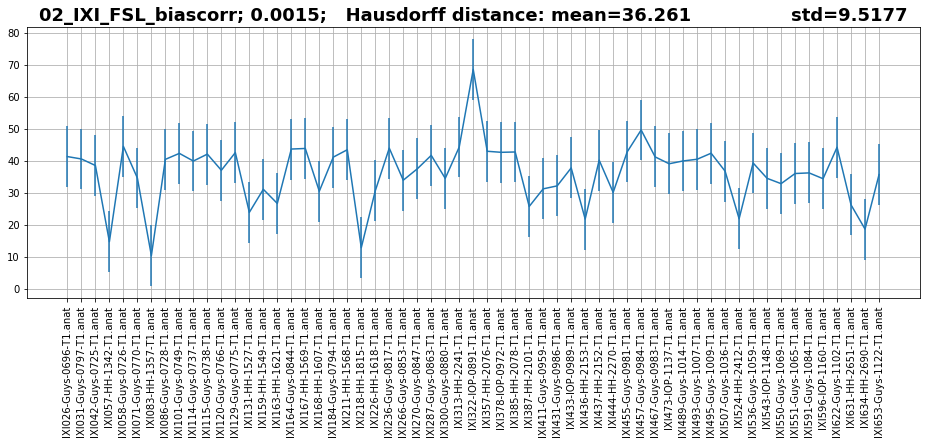

In [10]:
stat2 = plot_stats(experiments.loc[1])

### 03_IXI_FSL_biascorr

**************************************
*** Experiment 03_IXI_FSL_biascorr ***
**************************************
          dice  hausdorff_distance   jaccard     lr
mean  0.961894           17.594368  0.926738  0.002
std   0.009447           11.677310  0.017182  0.002





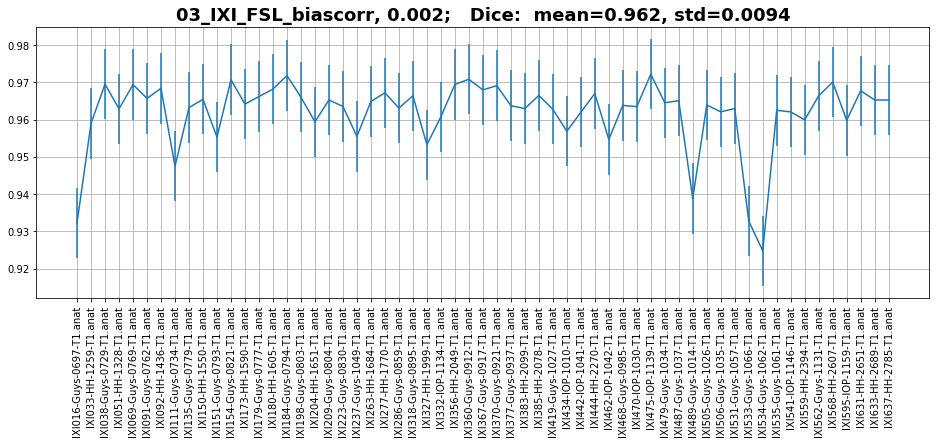

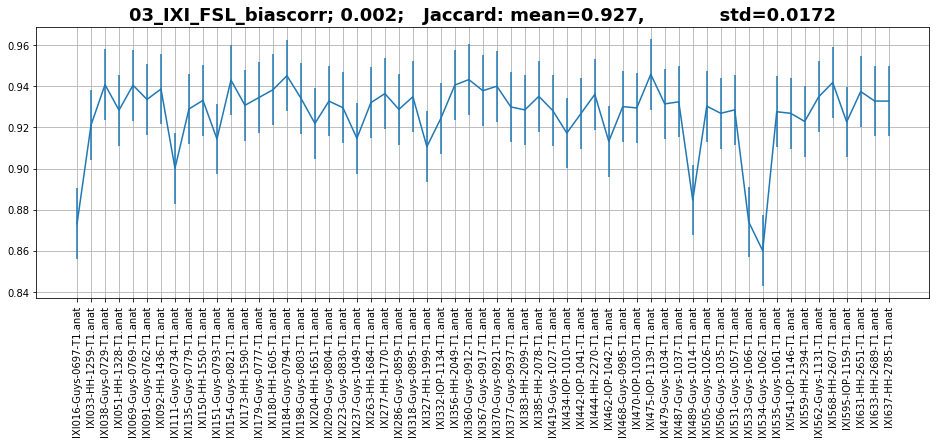

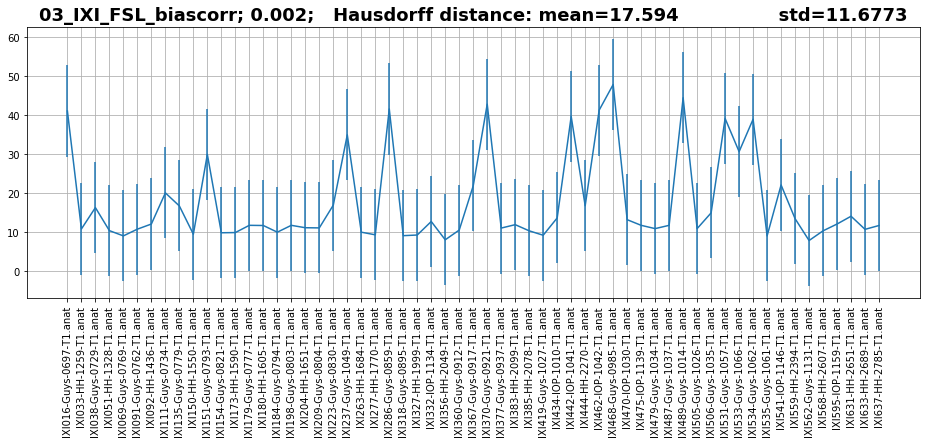

In [11]:
stat3 = plot_stats(experiments.loc[2])

### 04_IXI_FSL_T1

********************************
*** Experiment 04_IXI_FSL_T1 ***
********************************
          dice  hausdorff_distance   jaccard     lr
mean  0.945251           31.929190  0.901257  0.001
std   0.064358           14.381552  0.084998  0.001





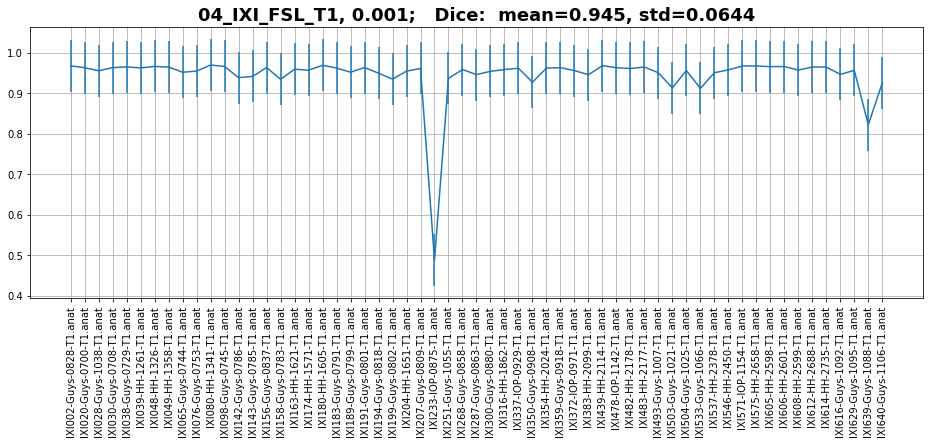

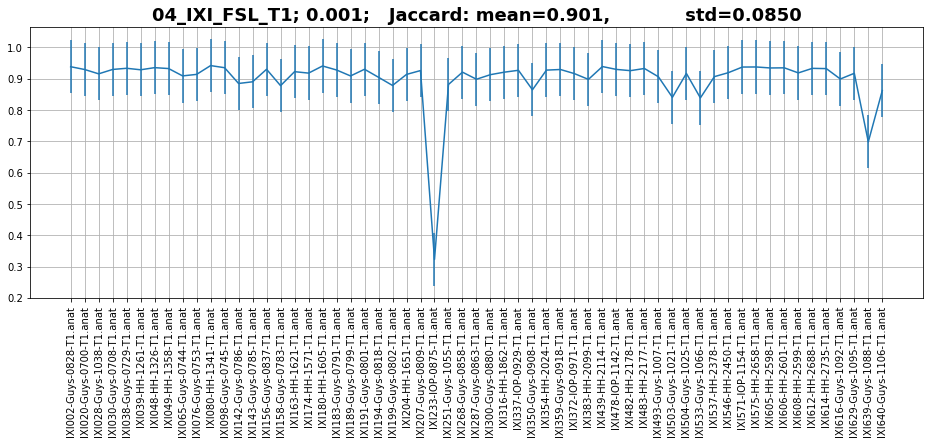

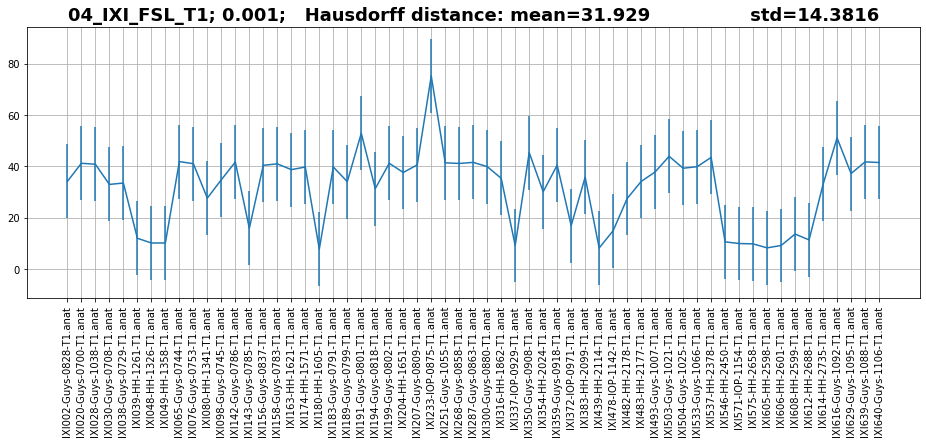

In [12]:
stat4 = plot_stats(experiments.loc[3])

### 05_IXI_FSL_T1

********************************
*** Experiment 05_IXI_FSL_T1 ***
********************************
          dice  hausdorff_distance   jaccard      lr
mean  0.946418           43.901098  0.901615  0.0015
std   0.051447           13.156173  0.069502  0.0015





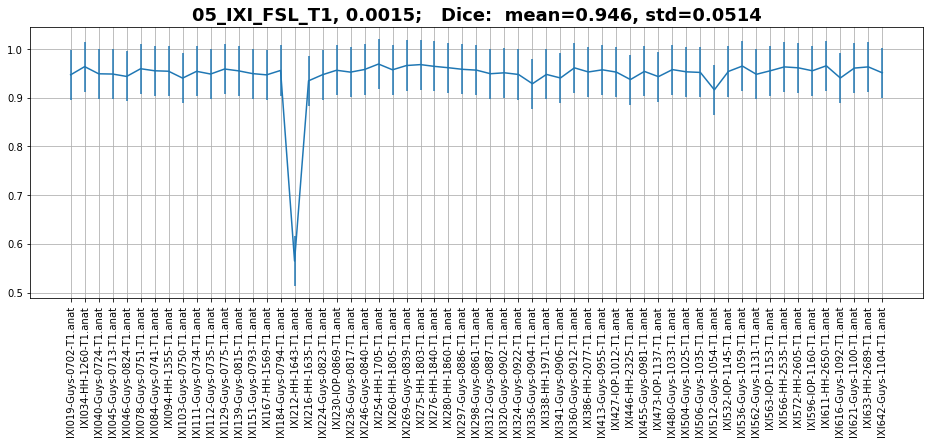

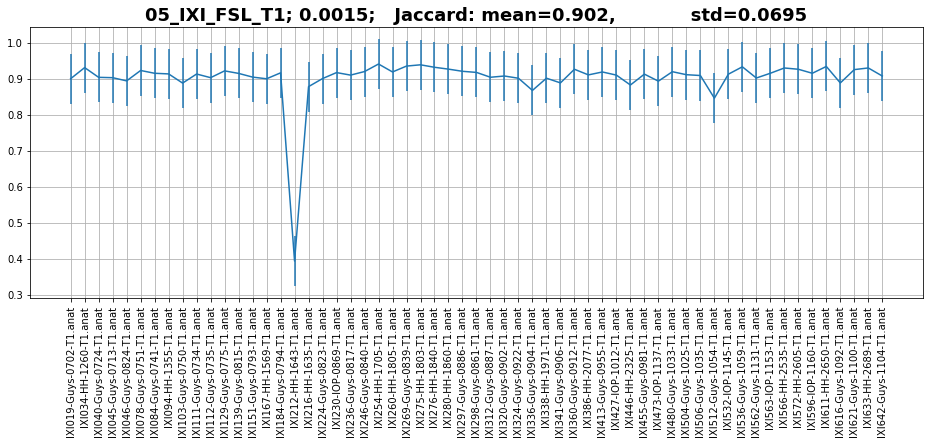

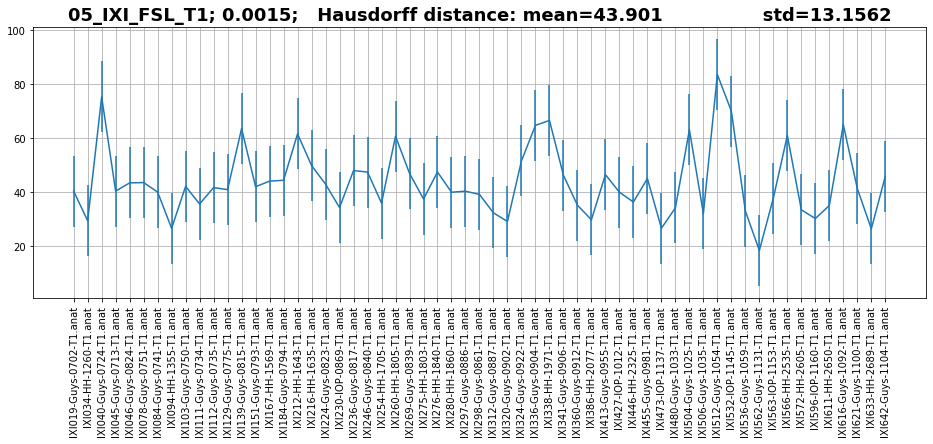

In [13]:
stat5 = plot_stats(experiments.loc[4])

### 06_IXI_FSL_T1

********************************
*** Experiment 06_IXI_FSL_T1 ***
********************************
          dice  hausdorff_distance   jaccard     lr
mean  0.961555           26.779774  0.926125  0.002
std   0.009895           15.819444  0.017959  0.002





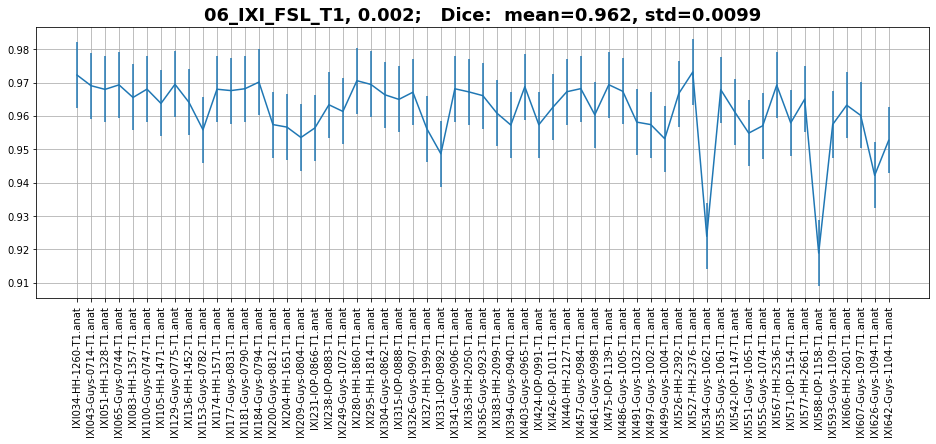

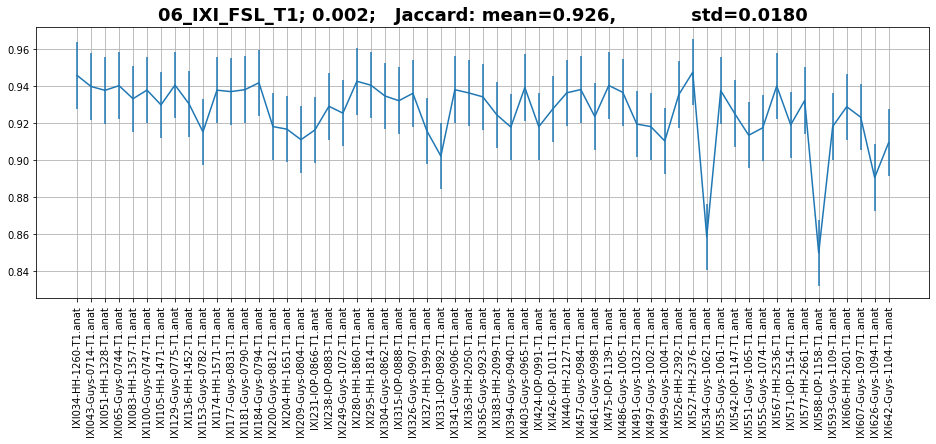

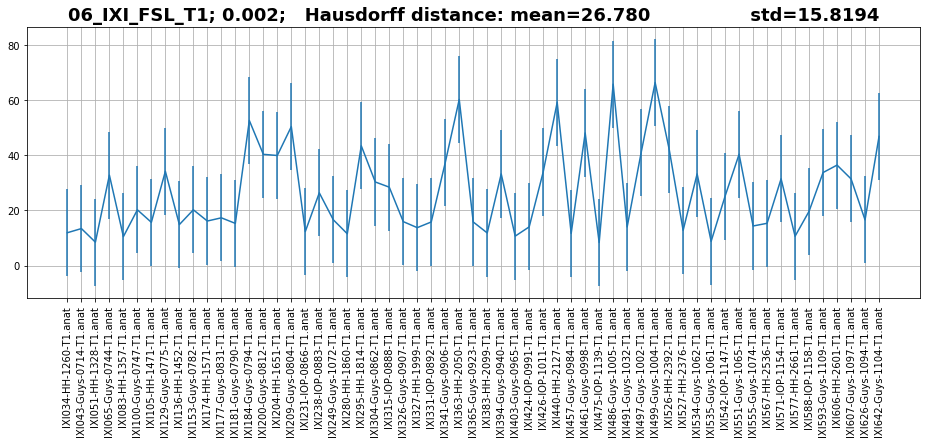

In [14]:
stat6 = plot_stats(experiments.loc[5])

In [15]:
print(stat1.loc['mean'])

dice                   0.957665
hausdorff_distance    15.765280
jaccard                0.922427
lr                     0.001000
Name: mean, dtype: float64


In [16]:
pd.concat([stat1, stat2, stat3], axis=0)

,dice,hausdorff_distance,jaccard,lr
mean,0.957665,15.765280,0.922427,0.0010
std,0.053583,12.070126,0.072496,0.0010
mean,0.914230,36.260830,0.853806,0.0015
std,0.097811,9.517662,0.133754,0.0015
mean,0.961894,17.594368,0.926738,0.0020
std,0.009447,11.677310,0.017182,0.0020


In [17]:
pd.concat([stat4, stat5, stat6])

,dice,hausdorff_distance,jaccard,lr
mean,0.945251,31.929190,0.901257,0.0010
std,0.064358,14.381552,0.084998,0.0010
mean,0.946418,43.901098,0.901615,0.0015
std,0.051447,13.156173,0.069502,0.0015
mean,0.961555,26.779774,0.926125,0.0020
std,0.009895,15.819444,0.017959,0.0020
